In [34]:
import os
import geopandas as gpd
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import descartes
import numpy as np
import pandas as pd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [35]:
ward_map = gpd.read_file('London-wards-2018_ESRI/London_Ward.shp')

<AxesSubplot:>

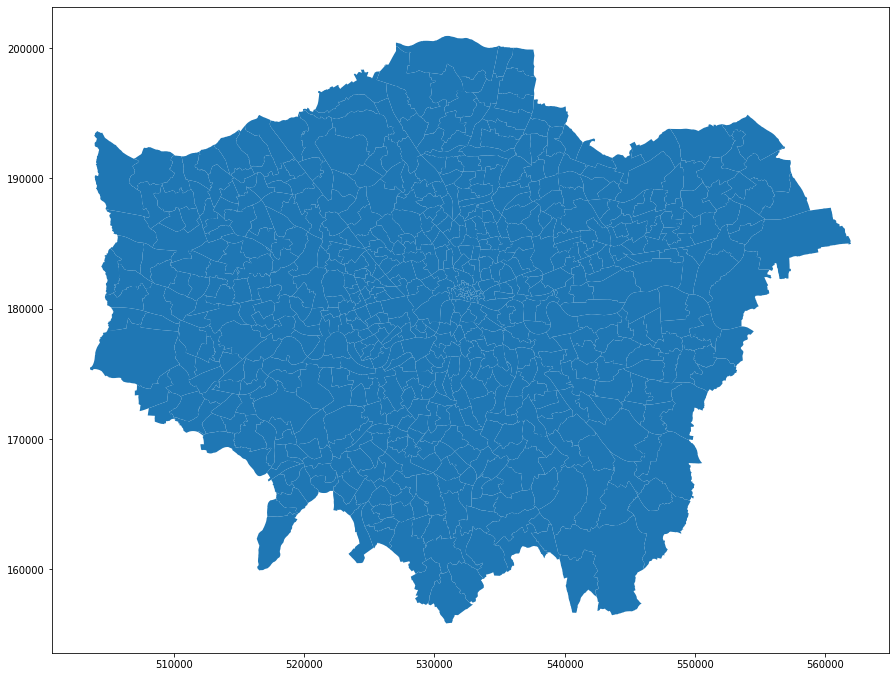

In [36]:
fig, ax = plt.subplots(figsize=(15,15))
ward_map.plot(ax=ax)

In [37]:
df = pd.read_csv('2022-11-city-of-london-street.csv')
crs = {'init':'epsg:4326'}
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,80ea32ef220648cf28f932d5af3ad7f17b0c8aee2bded4...,2022-11,City of London Police,City of London Police,-0.11035,51.51809,On or near Holborn,E01000917,Camden 027C,Other theft,Investigation complete; no suspect identified,NaN
1,5aa66ecd294396c789007925e2854b08e505e429b0c65c...,2022-11,City of London Police,City of London Police,-0.11035,51.51809,On or near Holborn,E01000917,Camden 027C,Other theft,Investigation complete; no suspect identified,NaN
2,1ff775d40c1cafc09a2c5237af7ce96662673291b93b50...,2022-11,City of London Police,City of London Police,-0.11035,51.51809,On or near Holborn,E01000917,Camden 027C,Other theft,Investigation complete; no suspect identified,NaN
3,86274b7c8020bc737a759d865b326304d5c6b486718c0c...,2022-11,City of London Police,City of London Police,-0.11035,51.51809,On or near Holborn,E01000917,Camden 027C,Other theft,Investigation complete; no suspect identified,NaN
4,48dd14dc102a4592f7591888762839ede6e513bff602c8...,2022-11,City of London Police,City of London Police,-0.11035,51.51809,On or near Holborn,E01000917,Camden 027C,Other theft,Investigation complete; no suspect identified,NaN


In [38]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]

In [39]:
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

/Users/willb/Library/Python/3.9/lib/python/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,geometry
0,80ea32ef220648cf28f932d5af3ad7f17b0c8aee2bded4...,2022-11,City of London Police,City of London Police,-0.11035,51.51809,On or near Holborn,E01000917,Camden 027C,Other theft,Investigation complete; no suspect identified,NaN,POINT (-0.11035 51.51809)
1,5aa66ecd294396c789007925e2854b08e505e429b0c65c...,2022-11,City of London Police,City of London Police,-0.11035,51.51809,On or near Holborn,E01000917,Camden 027C,Other theft,Investigation complete; no suspect identified,NaN,POINT (-0.11035 51.51809)
2,1ff775d40c1cafc09a2c5237af7ce96662673291b93b50...,2022-11,City of London Police,City of London Police,-0.11035,51.51809,On or near Holborn,E01000917,Camden 027C,Other theft,Investigation complete; no suspect identified,NaN,POINT (-0.11035 51.51809)
3,86274b7c8020bc737a759d865b326304d5c6b486718c0c...,2022-11,City of London Police,City of London Police,-0.11035,51.51809,On or near Holborn,E01000917,Camden 027C,Other theft,Investigation complete; no suspect identified,NaN,POINT (-0.11035 51.51809)
4,48dd14dc102a4592f7591888762839ede6e513bff602c8...,2022-11,City of London Police,City of London Police,-0.11035,51.51809,On or near Holborn,E01000917,Camden 027C,Other theft,Investigation complete; no suspect identified,NaN,POINT (-0.11035 51.51809)


<AxesSubplot:>

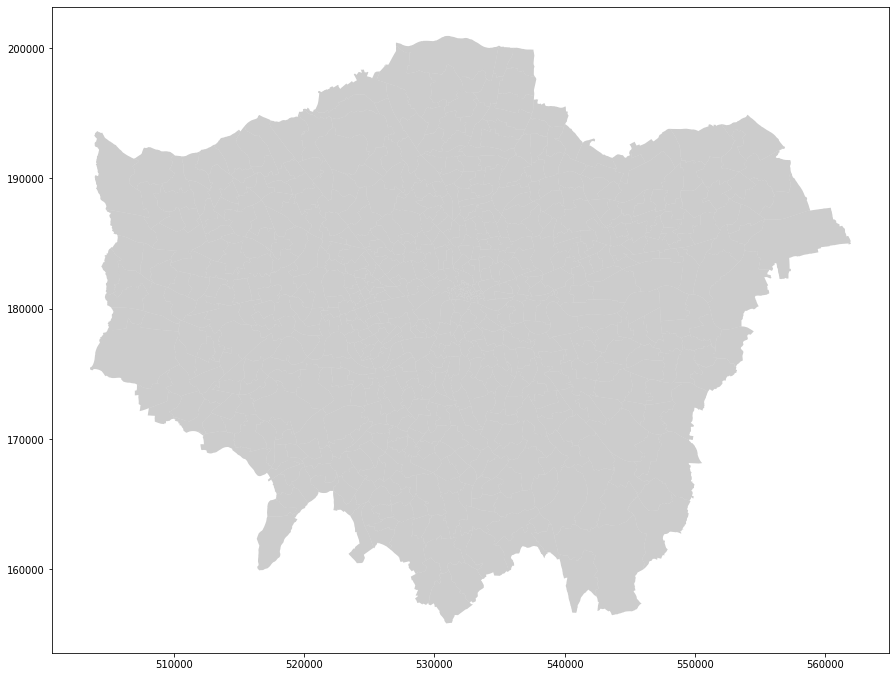

In [40]:
fig, ax = plt.subplots(figsize=(15,15))
ward_map.plot(ax=ax, alpha=0.4, color='grey')
